In [10]:
import pandas as pd
from marked_words import marked_words
import numpy as np

In [21]:
def pprint(dic):
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        print("%s, %.2f" % (word[0],word[1]))

# DV3 vs DV2

In [11]:
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.rcParams["figure.figsize"] = (14,6)
fontsizeval=35

In [12]:
# import stereotype lexicon
file = open("data/stereo_dict.pkl",'rb')
e_s_d = pickle.load(file)

In [13]:
df = pd.read_csv('data/dv3_main_generations.csv')
df_2 = pd.read_csv('data/dv2_main_generations.csv')

In [14]:
# Compute counts of words in Black stereotype lexicon in generated personas

temp = dict()
for r in df['race'].unique():
    temp[r] = df.loc[df['race']==r]['text'].str.lower().str.split(expand=False).replace('[^\w\s]','',regex=True)
    

fst_m = dict()
for c in temp.keys():
    full_list = []
    for sentence in temp[c]:
        full_list.extend(sentence)
    full_str = ' '.join(full_list)
    fst_m[c] = full_str
    
all_counts = dict()
aa_counts = dict()
for race,fullstring in fst_m.items():
#     print(race)
    counts = dict()
    for ethnic, stereolist in e_s_d['person'].items():
        count = 0
        for word in stereolist:
            count += fullstring.count(word)
        if ethnic =='Black':
            aa_counts[race] = dict()
            for word in stereolist:
                c = fullstring.count(word)
                aa_counts[race][word] = fullstring.count(word)
        counts[ethnic] = count
    all_counts[race] = counts
    

In [15]:
df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]','',regex=True)
df_2['text_clean'] = df_2['text'].str.lower().str.replace('[^\w\s]','',regex=True)


In [16]:
# count number of stereotype words in each data point based on lexicon and add to respective dataframes
eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df[k] = v

eth_counts = dict()
for ethnic, stereolist in e_s_d['person'].items():
    eth_counts[ethnic] = []
    for i,ro in df_2.iterrows():
        count = 0
        for word in stereolist:
            count += ro['text_clean'].count(word)
        count /= len(ro['text_clean'].split(' '))
        eth_counts[ethnic].append(count)
for k, v in eth_counts.items():
    df_2[k] = v

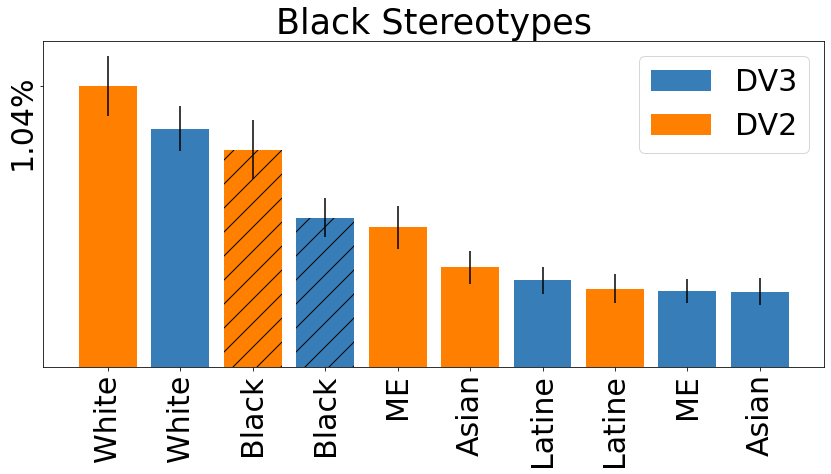

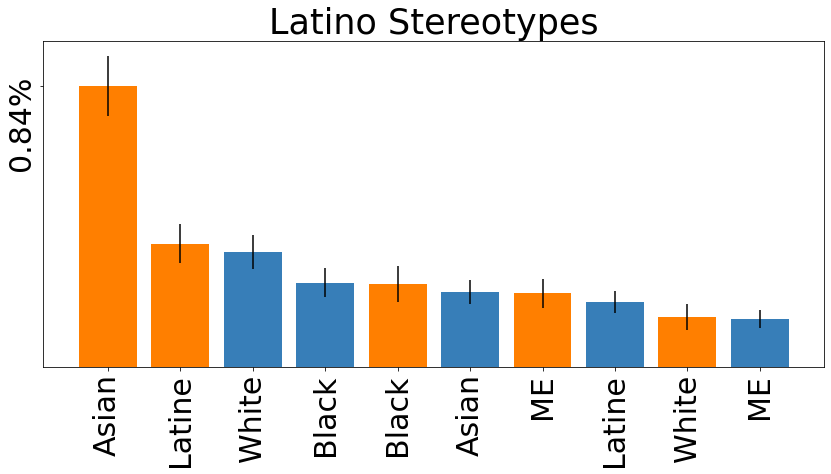

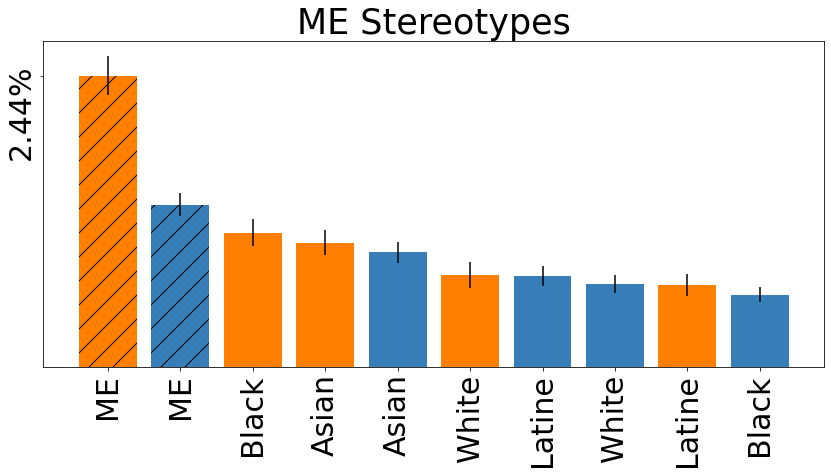

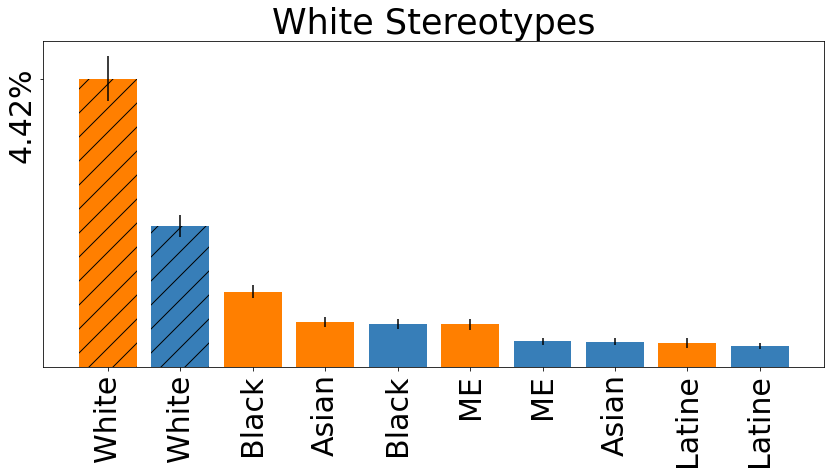

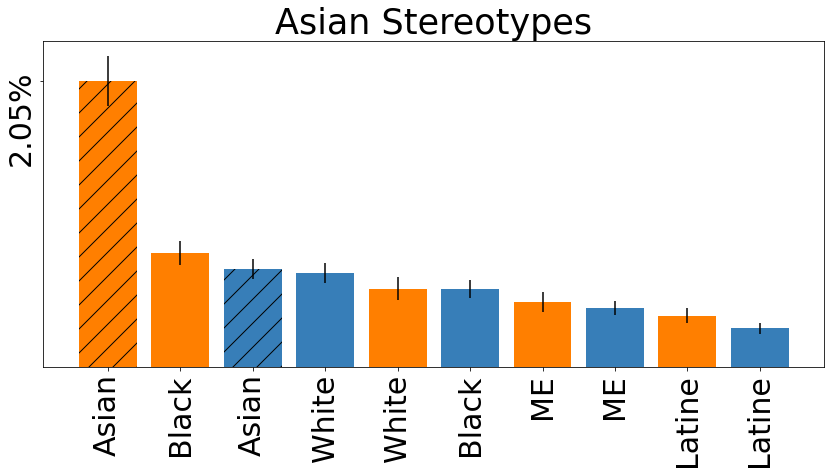

In [17]:

        
import matplotlib.ticker as mtick

for ethnic, stereolist in e_s_d['person'].items():
    reverse_count = dict()
    st='race'
    ra = df[st].unique()

    for i,r in enumerate(ra):
        b=np.mean(df.loc[df[st]==r][ethnic])
        c = np.std(df.loc[df[st]==r][ethnic])/ np.sqrt(np.size(df.loc[df[st]==r][ethnic]))
        if ethnic in reverse_count:
            reverse_count[ethnic][r.split(' ')[1]] = [b,c]
        else:
            reverse_count[ethnic] = {r.split(' ')[1]:[b,c]}
    temp=reverse_count[ethnic]
    names = list(temp.keys())
    values = list(temp.values())
#     print(len(values))
    c = [CB[0] for i in range(len(values))]

    reverse_count_2 = dict()
    
    fig, ax = plt.subplots()
    for i,r in enumerate(ra):
        b=np.mean(df_2.loc[df_2[st]==r][ethnic])
        std = np.std(df_2.loc[df_2[st]==r][ethnic])/ np.sqrt(np.size(df_2.loc[df_2[st]==r][ethnic]))

        if ethnic in reverse_count_2:
            reverse_count_2[ethnic][r.split(' ')[1]] = [b,std]
        else:
            reverse_count_2[ethnic] = {r.split(' ')[1]:[b,std]}
    temp=reverse_count_2[ethnic]
    names.extend(list(temp.keys()))
    values.extend(list(temp.values()))

    models = (['DV3']*5)
    models.extend(['DV2']*5)
    c.extend([CB[1] for i in range(len(values))])

    sor = sorted(zip(names,values,models,c),key=lambda p:p[1][0],reverse=True)
    
    names,values,models,c=zip(*sor)
    patt = []
    for n in names:
        if n[-1] in ['W','F']:
            patt.append('/')
        elif ethnic == n[-len(ethnic):]:
            patt.append('/')
        else:
            patt.append('')
    names=list(names)
    for i, n in enumerate(names):
        if n=='Middle-Eastern':
            names[i]='ME'
    if ethnic=='Middle-Eastern':
        ethnic='ME'
    plt.bar(range(len(values)), [v[0] for v in values], yerr=list([v[1] for v in values]),tick_label=names,color=c,hatch=patt,alpha=1)

    plt.title('%s Stereotypes' % ethnic,fontsize=fontsizeval)
    
    legend_elements = [Patch(facecolor=CB[0],
                             label='DV3'),
                       Patch(facecolor=CB[1],
                             label='DV2')]
    plt.yticks([values[0][0]])
    if ethnic=='Black':
        plt.legend(handles=legend_elements,fontsize=fontsizeval-5)
    plt.xticks(rotation = 90,fontsize=fontsizeval-5) # Rotates X-Axis Ticks by 45-degrees
    plt.yticks(fontsize=fontsizeval-5,rotation=90) # Rotates X-Axis Ticks by 45-degrees
    plt.gca().set_yticklabels([f'{x:.2%}' for x in plt.gca().get_yticks()]) 
    plt.savefig("figures/%s_st.pdf"%ethnic, format="pdf", bbox_inches="tight")
    plt.show()